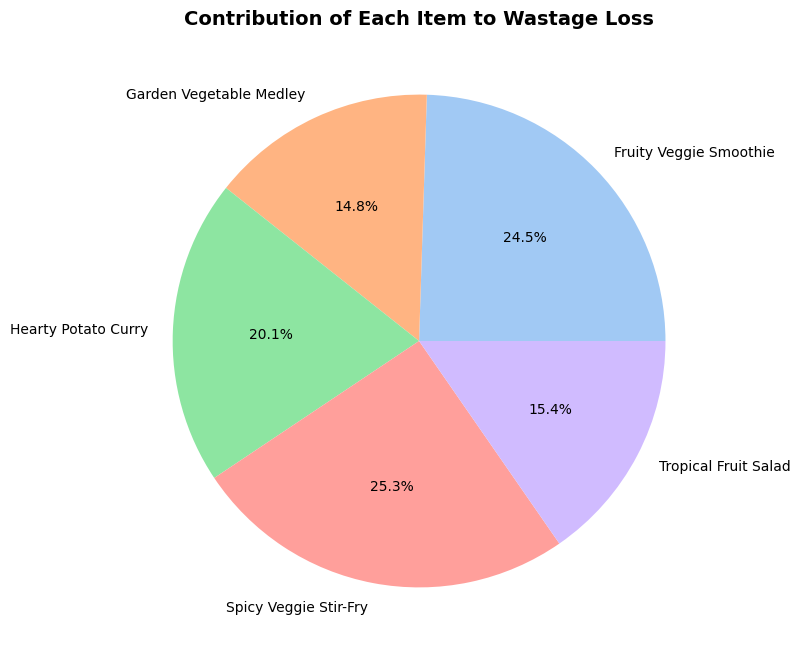

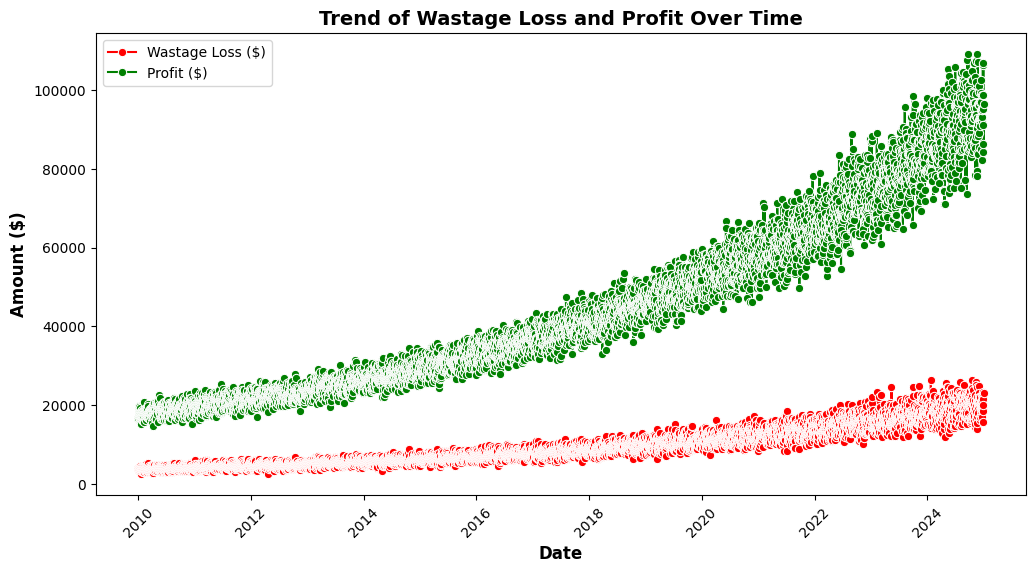

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("final_dataset.csv")
df["date"] = pd.to_datetime(df["date"])

ingredients = ["apple", "banana", "cucumber", "okra", "orange", "potato", "tomato"]

df["wastage"] = df["stock_level"] - df["sale_units"]
df["wastage"] = df["wastage"].clip(lower=0)  # Ensure wastage is non-negative

df["profit"] = (df["sale_units"] * df["price"]) - (df["sale_units"] * df["cost"])
df["wastage_loss"] = df["wastage"] * df["cost"]

# Aggregate Data
wastage_summary = df.groupby("item_name")["wastage_loss"].sum().reset_index()
profit_summary = df.groupby("item_name")["profit"].sum().reset_index()

# Merge Data
summary = pd.merge(wastage_summary, profit_summary, on="item_name")

#  Visualization 1: Pie Chart for Waste Contribution
plt.figure(figsize=(8, 8))
plt.pie(summary["wastage_loss"], labels=summary["item_name"], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Contribution of Each Item to Wastage Loss", fontsize=14, fontweight="bold")
plt.show()

#  Visualization 2: Wastage vs Profit Over Time (Line Chart)
df_time = df.groupby("date")[["wastage_loss", "profit"]].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="wastage_loss", data=df_time, label="Wastage Loss ($)", color="red", marker="o")
sns.lineplot(x="date", y="profit", data=df_time, label="Profit ($)", color="green", marker="o")

plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.title("Trend of Wastage Loss and Profit Over Time", fontsize=14, fontweight="bold")
plt.legend()
plt.xticks(rotation=45)
plt.show()



Options:
1️⃣ View monthly profit for a specific year
2️⃣ Plot total yearly profit


C:\Users\hp\AppData\Local\Temp\ipykernel_7704\1766852564.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_profit["year"], y=yearly_profit["profit"], palette="Greens_r")


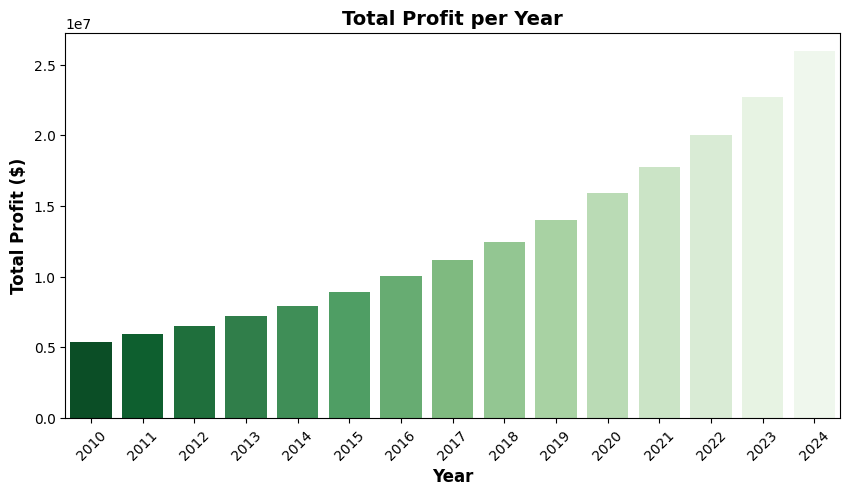

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("realistic_dataset.csv")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

if "profit" not in df.columns:
    df["profit"] = (df["sale_units"] * df["price"]) - (df["sale_units"] * df["cost"])

# User choice
print("\nOptions:")
print("View monthly profit for a specific year")
print("Plot total yearly profit")
choice = int(input("Enter your choice (1 or 2): "))

if choice == 1:
    selected_year = int(input("Enter the year (e.g., 2024): "))
    monthly_profit = df[df["year"] == selected_year].groupby("month")["profit"].sum().reset_index()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=monthly_profit["month"], y=monthly_profit["profit"], palette="Blues_r")
    plt.xlabel("Month", fontsize=12, fontweight="bold")
    plt.ylabel("Total Profit ($)", fontsize=12, fontweight="bold")
    plt.title(f"Monthly Profit for {selected_year}", fontsize=14, fontweight="bold")
    plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()

elif choice == 2:
    yearly_profit = df.groupby("year")["profit"].sum().reset_index()


    plt.figure(figsize=(10, 5))
    sns.barplot(x=yearly_profit["year"], y=yearly_profit["profit"], palette="Greens_r")
    plt.xlabel("Year", fontsize=12, fontweight="bold")
    plt.ylabel("Total Profit ($)", fontsize=12, fontweight="bold")
    plt.title("Total Profit per Year", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45)
    plt.show()

else:
    print("❌ Invalid choice! Please enter 1 or 2.")


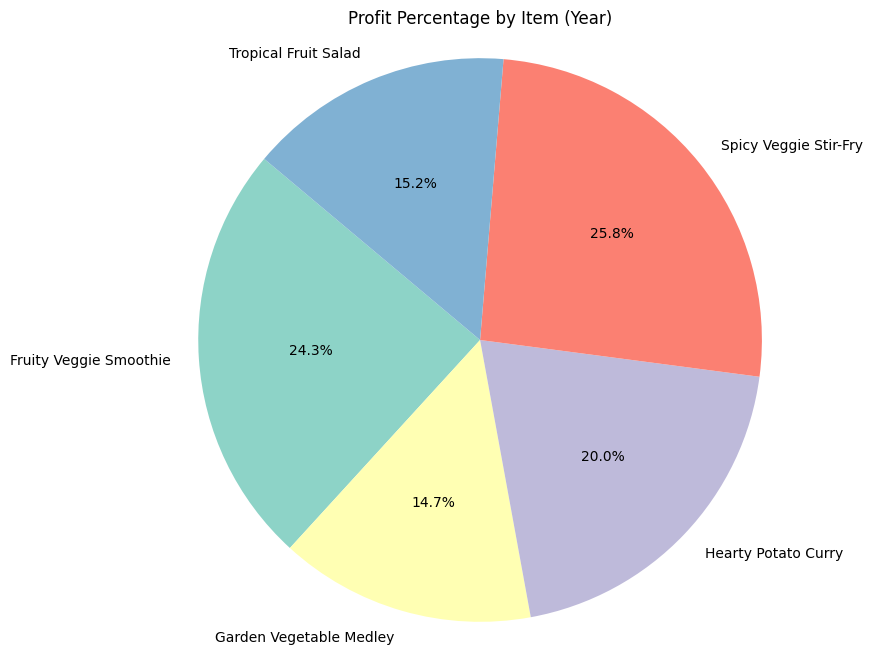

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("realistic_dataset.csv")

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Extract year and month
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# Ensure necessary columns exist
required_columns = ["date", "item_name", "profit"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"Missing columns in dataset: {missing_columns}")

# User input: Yearly or Monthly profit percentage visualization
view_option = input("Enter 'year' for yearly profit percentage or 'month' for monthly profit percentage: ").strip().lower()

if view_option == "year":
    # Ask for a specific year
    selected_year = int(input("Enter the year: "))

    # Filter data for the selected year
    df_year = df[df["year"] == selected_year]

    # Aggregate total profit per item
    product_profit = df_year.groupby("item_name")["profit"].sum()

elif view_option == "month":
    # Ask for a specific year and month
    selected_year = int(input("Enter the year: "))
    selected_month = int(input("Enter the month (1-12): "))

    # Filter data for the selected month and year
    df_month = df[(df["year"] == selected_year) & (df["month"] == selected_month)]

    # Aggregate total profit per item
    product_profit = df_month.groupby("item_name")["profit"].sum()

else:
    print("Invalid input! Please enter 'year' or 'month'.")
    exit()

# Calculate percentage contribution of each item to total profit
total_profit = product_profit.sum()
profit_percentage = (product_profit / total_profit) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(profit_percentage, labels=profit_percentage.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set3"))
plt.title(f"Profit Percentage by Item ({'Year' if view_option == 'year' else 'Month'})")
plt.axis("equal")  # Ensures pie chart is circular
plt.show()
